#  Load libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [2]:
df=pd.read_csv("run.csv")
value=['weather','just_ate','late_at_work']
df

,day,weather,just_ate,late_at_work,will_i_go_running
0,1,sunny,yes,no,yes
1,2,rainy,yes,yes,no
2,3,sunny,no,yes,yes
3,4,rainy,no,no,no
4,5,rainy,no,no,yes
5,6,sunny,yes,no,yes
6,7,rainy,no,yes,no


# Data Analysis

In [3]:
len(df)           #Dataset Lenght

7

In [4]:
df.shape  #To see the number of rows and columns in our dataset:

(7, 5)

In [5]:
df.head()         #To inspect the first five records of the dataset:

,day,weather,just_ate,late_at_work,will_i_go_running
0,1,sunny,yes,no,yes
1,2,rainy,yes,yes,no
2,3,sunny,no,yes,yes
3,4,rainy,no,no,no
4,5,rainy,no,no,yes


In [6]:
df.tail()         #To inspect the last five records of the dataset:

,day,weather,just_ate,late_at_work,will_i_go_running
2,3,sunny,no,yes,yes
3,4,rainy,no,no,no
4,5,rainy,no,no,yes
5,6,sunny,yes,no,yes
6,7,rainy,no,yes,no


In [7]:
df.describe()     #To see statistical details of the dataset:

,day
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000


# Preparing the Data (Data Slicing)

In [8]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,day,weather,just_ate,late_at_work,will_i_go_running
0,0,1,1,0,1
1,1,0,1,1,0
2,2,1,0,1,1
3,3,0,0,0,0
4,4,0,0,0,1
5,5,1,1,0,1
6,6,0,0,1,0


In [9]:
#To divide our data into attribute set and Label:
feature_cols = value
X = df[feature_cols]                               #contains the attribute 
y = df.will_i_go_running                                  #contains the label

# Training and Making Predictions

In [10]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X, y)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier()

# Visualizing Decision Trees

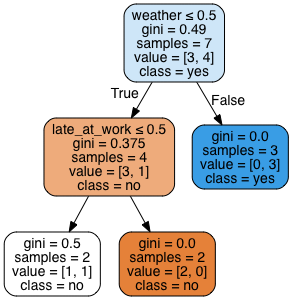

In [11]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names =value,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('running.png')
Image(graph.create_png())